In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture de la base de données à partir du fichier CSV et sauvegarde dans la variable 'original_data'
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Fonction pour assigner les groupes en fonction des quartiles
def assign_group(row, q1, q2, q3):
    if row['pcexp'] < q1:
        return 1
    elif q1 <= row['pcexp'] < q2:
        return 2
    elif q2 <= row['pcexp'] < q3:
        return 3
    else:
        return 4

# Calcul des quartiles pour chaque région
quartiles = original_data.groupby('region')['pcexp'].quantile([0.25, 0.50, 0.75]).unstack()

# Application de la fonction pour assigner le groupe
original_data['Groupe'] = original_data.apply(
    lambda row: assign_group(row, quartiles.loc[row['region'], 0.25], quartiles.loc[row['region'], 0.50], quartiles.loc[row['region'], 0.75]),
    axis=1
)

# Affichage des premières lignes pour vérifier les résultats
print(original_data[['region', 'pcexp', 'Groupe']].head(10))



               region       pcexp  Groupe
0  AUTONOME D'ABIDJAN  1020831.75       3
1  AUTONOME D'ABIDJAN  1298278.10       4
2  AUTONOME D'ABIDJAN  1183043.40       3
3  AUTONOME D'ABIDJAN  1683393.00       4
4  AUTONOME D'ABIDJAN  1470485.80       4
5  AUTONOME D'ABIDJAN  1933955.80       4
6  AUTONOME D'ABIDJAN   585332.40       2
7  AUTONOME D'ABIDJAN   844232.40       3
8  AUTONOME D'ABIDJAN  1610790.50       4
9  AUTONOME D'ABIDJAN  2042061.90       4


In [2]:
# 1. Calcul du nombre d'observations dans chaque groupe par région
group_counts = original_data.pivot_table(index='region', columns='Groupe', aggfunc='size', fill_value=0)

# Affichage du tableau
print(group_counts)

# 2. Visualisation des résultats avec un barplot
# Réinitialisation de l'index pour faciliter le tracé
group_counts = group_counts.reset_index()



Groupe                1    2    3    4
region                                
AGNEBY-TIASSA       102  102  102  102
AUTONOME D'ABIDJAN  252  251  251  252
BAFING               60   60   60   60
BAGOUE               78   78   78   78
BELIER               78   77   78   78
BERE                 78   78   78   78
BOUNKANI             66   66   66   66
CAVALLY              90   90   90   90
FOLON                66   66   66   66
GBEKE               126  126  126  126
GBÔKLE               84   84   84   84
GONTOUGO            102  102  102  102
GRANDS-PONTS         78   78   78   78
GUEMON              120  120  120  120
GÔH                 119  119  119  120
HAMBOL               84   84   84   84
HAUT-SASSANDRA      150  150  150  150
IFFOU                72   71   72   72
INDENIE-DJUABLIN     96   96   96   96
KABADOUGOU           60   59   59   60
LA ME                96   96   96   96
LÔH-DJIBOUA         108  108  108  108
MARAHOUE            120  119  119  120
MORONOU              78  

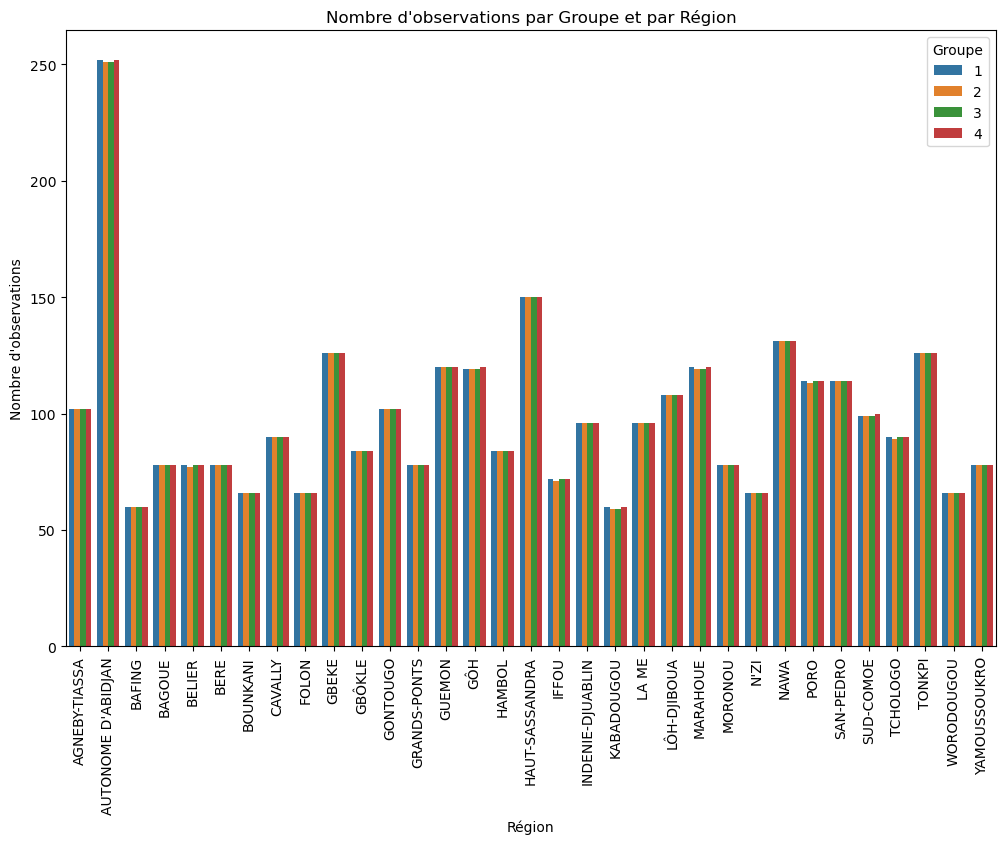

In [3]:
# Transformation du DataFrame pour qu'il soit au format long (facilite le tracé avec seaborn)
group_counts_long = group_counts.melt(id_vars='region', value_vars=[1, 2, 3, 4], var_name='Groupe', value_name='Count')

# Création du barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='Count', hue='Groupe', data=group_counts_long)
plt.title('Nombre d\'observations par Groupe et par Région')
plt.xticks(rotation=90)
plt.ylabel('Nombre d\'observations')
plt.xlabel('Région')
plt.legend(title='Groupe')
plt.show()



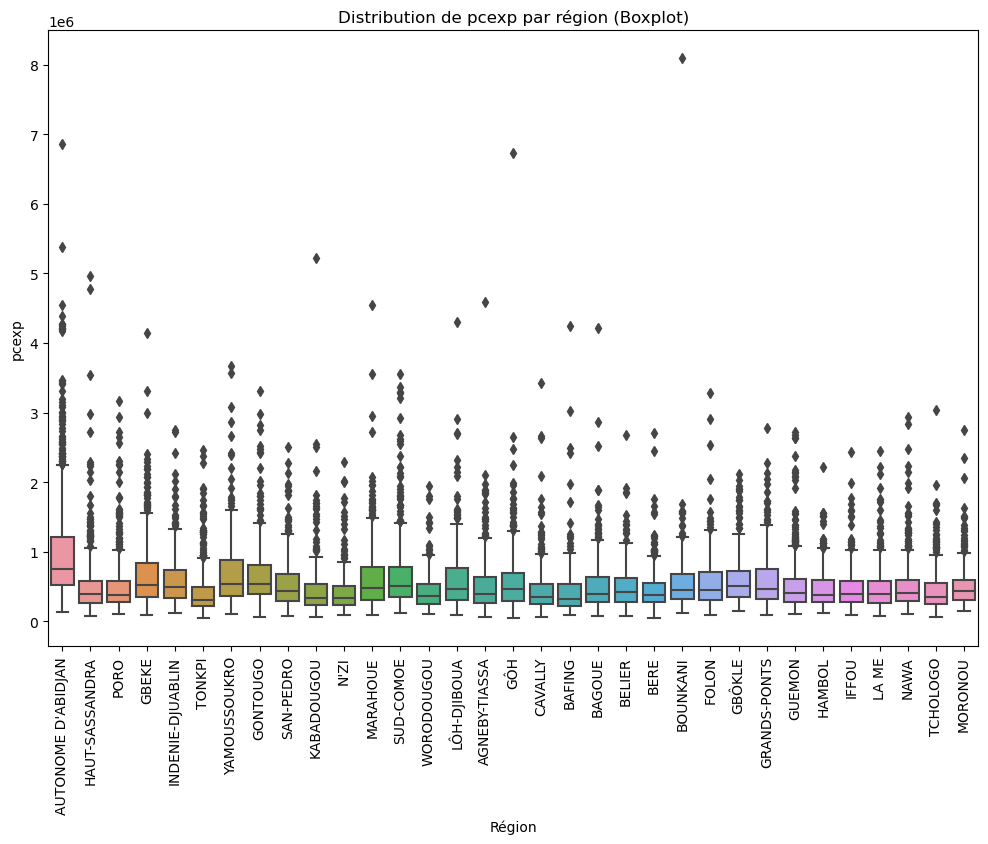

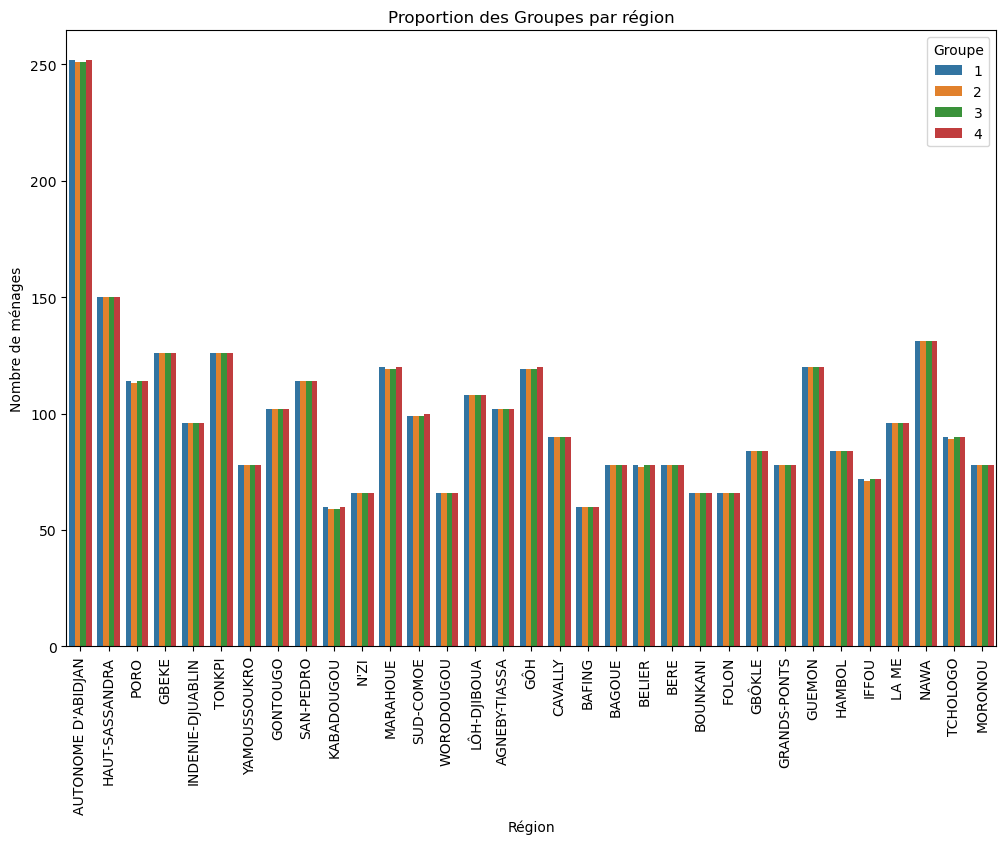

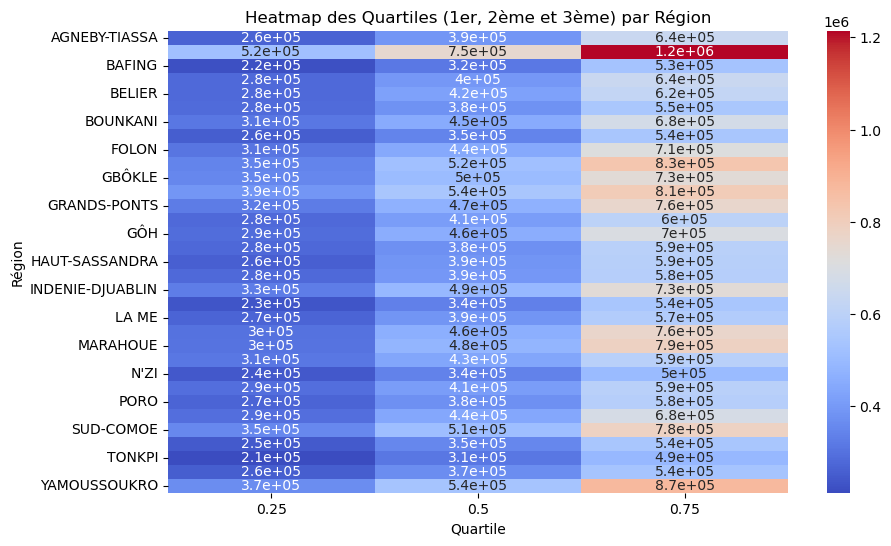

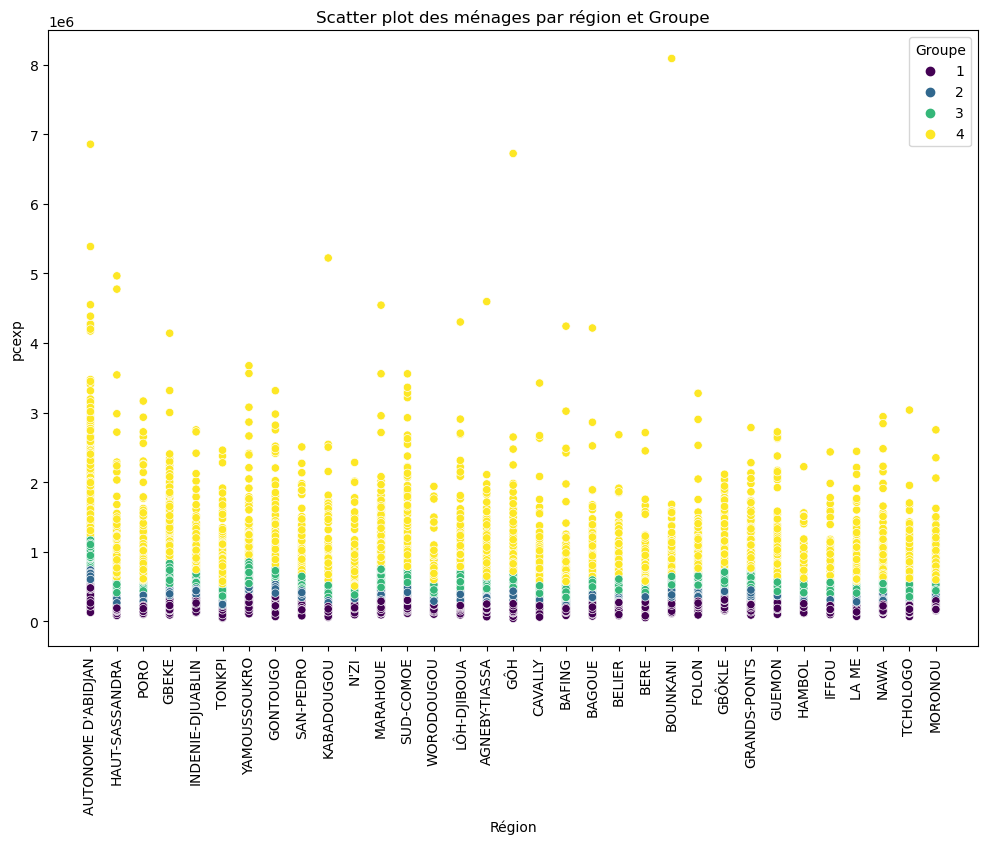

In [4]:
# 3. Boxplot de la distribution des 'pcexp' pour chaque région
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='pcexp', data=original_data)
plt.title('Distribution de pcexp par région (Boxplot)')
plt.xticks(rotation=90)
plt.ylabel('pcexp')
plt.xlabel('Région')
plt.show()

# 4. Barplot pour les proportions des groupes par région
plt.figure(figsize=(12, 8))
sns.countplot(x='region', hue='Groupe', data=original_data)
plt.title('Proportion des Groupes par région')
plt.xticks(rotation=90)
plt.ylabel('Nombre de ménages')
plt.xlabel('Région')
plt.legend(title='Groupe')
plt.show()

# 5. Heatmap des quartiles par région
quartiles = original_data.groupby('region')['pcexp'].quantile([0.25, 0.50, 0.75]).unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(quartiles, annot=True, cmap='coolwarm')
plt.title('Heatmap des Quartiles (1er, 2ème et 3ème) par Région')
plt.ylabel('Région')
plt.xlabel('Quartile')
plt.show()

# 6. Scatter plot des ménages par région avec les groupes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='region', y='pcexp', hue='Groupe', data=original_data, palette='viridis')
plt.title('Scatter plot des ménages par région et Groupe')
plt.xticks(rotation=90)
plt.ylabel('pcexp')
plt.xlabel('Région')
plt.legend(title='Groupe')
plt.show()



In [4]:
# Calcul du nombre d'observations dans chaque groupe
group_counts = original_data['Groupe'].value_counts().sort_index()

# Affichage du résultat
print(group_counts)



Groupe
1    3247
2    3240
3    3244
4    3249
Name: count, dtype: int64


In [6]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV et sauvegarde dans la variable 'original_data'
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Fonction pour calculer la corrélation entre 'pcexp' et 'nightlights_50m' pour chaque sous-groupe
def calculate_correlation(df):
    return df['pcexp'].corr(df['nightlights_50m'])

# Calcul de la corrélation par région
correlation_per_region = original_data.groupby('region').apply(calculate_correlation).reset_index()
correlation_per_region.columns = ['Région', 'Corrélation pcexp - nightlights_50m']

# Calcul de la corrélation par grappe
correlation_per_grappe = original_data.groupby(['region', 'grappe']).apply(calculate_correlation).reset_index()
correlation_per_grappe.columns = ['Région', 'Grappe', 'Corrélation pcexp - nightlights_50m']

# Affichage des résultats
print("Corrélation entre la conso par tete du ménage et l'intensité lumineuse nocturne par région :")
print(correlation_per_region)

print("\nCorrélation entre la conso par tete du ménage et l'intensité lumineuse nocturne par grappe :")
print(correlation_per_grappe)


Corrélation entre la conso par tete du ménage et l'intensité lumineuse nocturne par région :
                Région  Corrélation pcexp - nightlights_50m
0        AGNEBY-TIASSA                             0.250862
1   AUTONOME D'ABIDJAN                             0.304588
2               BAFING                             0.379777
3               BAGOUE                             0.208134
4               BELIER                             0.165039
5                 BERE                            -0.012375
6             BOUNKANI                             0.151280
7              CAVALLY                             0.159312
8                FOLON                             0.259191
9                GBEKE                             0.202890
10              GBÔKLE                             0.202608
11            GONTOUGO                             0.334923
12        GRANDS-PONTS                             0.137873
13              GUEMON                             0.268609
14     

In [7]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV et sauvegarde dans la variable 'original_data'
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul de la moyenne de 'pcexp' et de 'nightlights_50m' pour chaque région
mean_per_region = original_data.groupby('region')[['pcexp', 'nightlights_50m']].mean().reset_index()

# Calcul de la corrélation entre les moyennes de 'pcexp' et de 'nightlights_50m' par région
correlation_region = mean_per_region['pcexp'].corr(mean_per_region['nightlights_50m'])

print("Corrélation entre la moyenne de pcexp et la moyenne de nightlights_50m par région :")
print(correlation_region)

# Calcul de la moyenne de 'pcexp' et de 'nightlights_50m' pour chaque grappe au sein de chaque région
mean_per_grappe = original_data.groupby(['region', 'grappe'])[['pcexp', 'nightlights_50m']].mean().reset_index()

# Calcul de la corrélation entre les moyennes de 'pcexp' et de 'nightlights_50m' par grappe
correlation_grappe = mean_per_grappe['pcexp'].corr(mean_per_grappe['nightlights_50m'])

print("\nCorrélation entre la moyenne de pcexp et la moyenne de nightlights_50m par grappe :")
print(correlation_grappe)


Corrélation entre la moyenne de pcexp et la moyenne de nightlights_50m par région :
0.7121268560582595

Corrélation entre la moyenne de pcexp et la moyenne de nightlights_50m par grappe :
0.60914885263137


In [8]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV et sauvegarde dans la variable 'original_data'
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul de la médiane de 'pcexp' et de 'nightlights_50m' pour chaque région
median_per_region = original_data.groupby('region')[['pcexp', 'nightlights_50m']].median().reset_index()

# Calcul de la corrélation entre les médianes de 'pcexp' et de 'nightlights_50m' par région
correlation_region = median_per_region['pcexp'].corr(median_per_region['nightlights_50m'])

print("Corrélation entre la médiane de pcexp et la médiane de nightlights_50m par région :")
print(correlation_region)

# Calcul de la médiane de 'pcexp' et de 'nightlights_50m' pour chaque grappe au sein de chaque région
median_per_grappe = original_data.groupby(['region', 'grappe'])[['pcexp', 'nightlights_50m']].median().reset_index()

# Calcul de la corrélation entre les médianes de 'pcexp' et de 'nightlights_50m' par grappe
correlation_grappe = median_per_grappe['pcexp'].corr(median_per_grappe['nightlights_50m'])

print("\nCorrélation entre la médiane de pcexp et la médiane de nightlights_50m par grappe :")
print(correlation_grappe)


Corrélation entre la médiane de pcexp et la médiane de nightlights_50m par région :
0.6957949630712609

Corrélation entre la médiane de pcexp et la médiane de nightlights_50m par grappe :
0.6110397411753317


In [14]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Corrélation entre les valeurs de 'pcexp' et 'nightlights_50m' par 'milieu'
corr_values = original_data.groupby('milieu').apply(lambda x: x['pcexp'].corr(x['nightlights_50m']))

# Corrélation entre la moyenne de 'pcexp' et la moyenne de 'nightlights_50m' par 'milieu'
mean_corr = original_data.groupby('milieu').apply(lambda x: x['pcexp'].mean()).corr(
             original_data.groupby('milieu').apply(lambda x: x['nightlights_50m'].mean()))

# Corrélation entre la médiane de 'pcexp' et la médiane de 'nightlights_50m' par 'milieu'
median_corr = original_data.groupby('milieu').apply(lambda x: x['pcexp'].median()).corr(
              original_data.groupby('milieu').apply(lambda x: x['nightlights_50m'].median()))

# Affichage des résultats
print("Corrélation entre les valeurs de 'pcexp' et 'nightlights_50m' par 'milieu':")
print(corr_values)

print("\nCorrélation entre la moyenne de 'pcexp' et la moyenne de 'nightlights_50m' par 'milieu':")
print(f"{mean_corr:.4f}")

print("\nCorrélation entre la médiane de 'pcexp' et la médiane de 'nightlights_50m' par 'milieu':")
print(f"{median_corr:.4f}")


Corrélation entre les valeurs de 'pcexp' et 'nightlights_50m' par 'milieu':
milieu
Rural     0.105773
Urbain    0.269033
dtype: float64

Corrélation entre la moyenne de 'pcexp' et la moyenne de 'nightlights_50m' par 'milieu':
1.0000

Corrélation entre la médiane de 'pcexp' et la médiane de 'nightlights_50m' par 'milieu':
1.0000


In [15]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul du maximum de 'pcexp' et 'nightlights_50m' par région
max_per_region = original_data.groupby('region')[['pcexp', 'nightlights_50m']].max().reset_index()

# Calcul de la corrélation entre les maximums par région
region_corr = max_per_region['pcexp'].corr(max_per_region['nightlights_50m'])

# Calcul du maximum de 'pcexp' et 'nightlights_50m' par grappe
max_per_grappe = original_data.groupby(['region', 'grappe'])[['pcexp', 'nightlights_50m']].max().reset_index()

# Calcul de la corrélation entre les maximums par grappe
grappe_corr = max_per_grappe['pcexp'].corr(max_per_grappe['nightlights_50m'])

# Affichage des résultats
print("Corrélation entre le maximum de 'pcexp' et le maximum de 'nightlights_50m' par région:")
print(f"{region_corr:.4f}")

print("\nCorrélation entre le maximum de 'pcexp' et le maximum de 'nightlights_50m' par grappe:")
print(f"{grappe_corr:.4f}")


Corrélation entre le maximum de 'pcexp' et le maximum de 'nightlights_50m' par région:
0.2124

Corrélation entre le maximum de 'pcexp' et le maximum de 'nightlights_50m' par grappe:
0.4212


In [13]:
import pandas as pd

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul de la corrélation entre 'pcexp' et 'nightlights_50m'
correlation = original_data['pcexp'].corr(original_data['nightlights_50m'])

# Affichage du résultat
print(f"La corrélation entre 'pcexp' et 'nightlights_50m' est de : {correlation:.4f}")


La corrélation entre 'pcexp' et 'nightlights_50m' est de : 0.3372


Cas 1: Région - Moyenne pcexp vs Moyenne nightlights_50m
R²: 0.4963, MSE: 7922494066.7270, MAE: 74194.1477


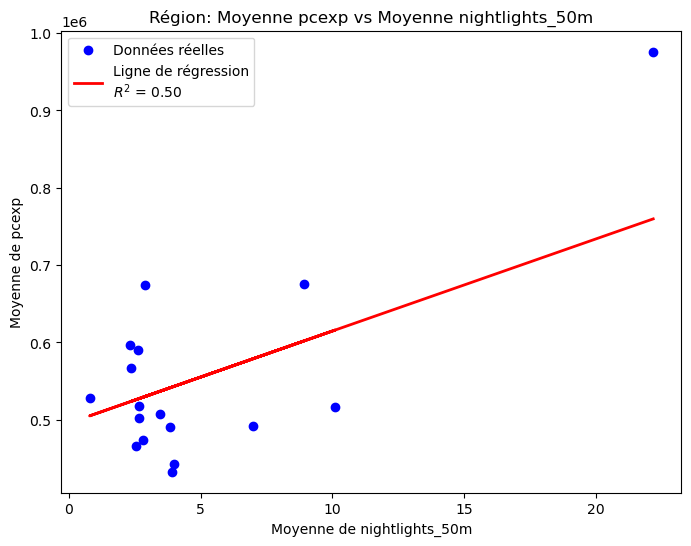


Cas 2: Grappe - Moyenne pcexp vs Moyenne nightlights_50m
R²: 0.3636, MSE: 43927422561.6454, MAE: 142077.1915


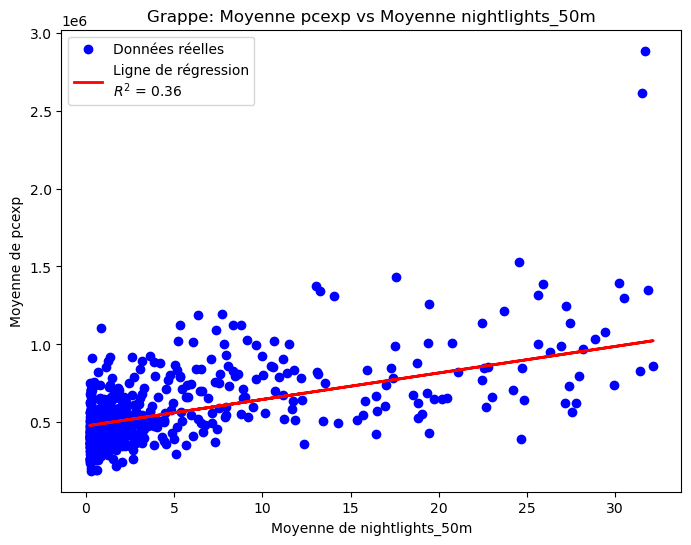


Cas 3: Région - Validation croisée 2-fold
R² moyen: 0.3531


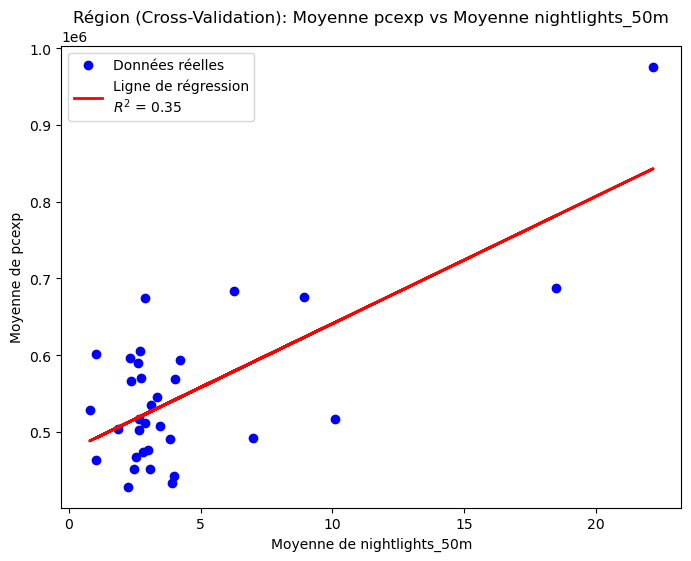


Cas 4: Grappe - Validation croisée 2-fold
R² moyen: 0.3449


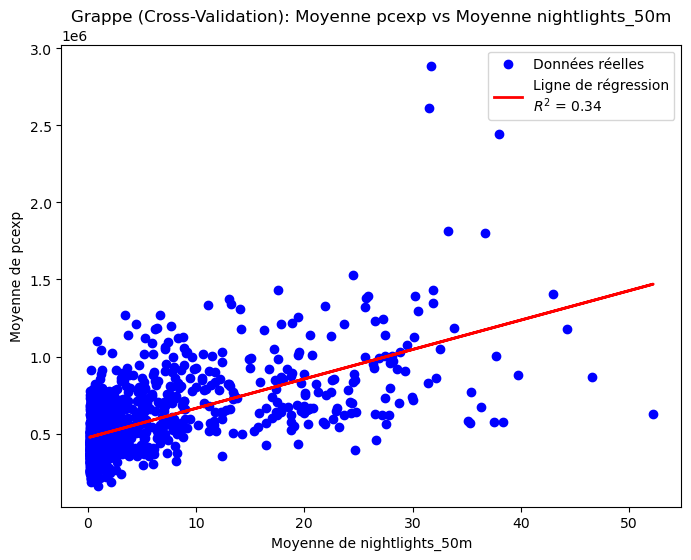

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul des moyennes par région
mean_per_region = original_data.groupby('region')[['pcexp', 'nightlights_50m']].mean().reset_index()

# Calcul des moyennes par grappe
mean_per_grappe = original_data.groupby(['region', 'grappe'])[['pcexp', 'nightlights_50m']].mean().reset_index()

# Fonction pour ajuster et évaluer une régression OLS
def ols_regression(X_train, X_test, y_train, y_test):
    X_train = sm.add_constant(X_train)  # Ajout de l'intercept pour l'entraînement
    X_test = sm.add_constant(X_test)    # Ajout de l'intercept pour le test
    model = sm.OLS(y_train, X_train).fit()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Évaluation sur l'ensemble de test
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    return model, r2, mse, mae, y_pred_test

# Fonction pour afficher le graphe de régression
def plot_regression(X, y, y_pred, title, r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Données réelles')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Ligne de régression\n$R^2$ = {r2:.2f}')
    plt.title(title)
    plt.xlabel('Moyenne de nightlights_50m')
    plt.ylabel('Moyenne de pcexp')
    plt.legend()
    plt.show()

# Cas 1: Prédire la moyenne des 'pcexp' pour chaque région en fonction des moyennes de 'nightlights_50m' pour chaque région
X_region = mean_per_region['nightlights_50m']
y_region = mean_per_region['pcexp']

# Split des données en entraînement et test
X_region_train, X_region_test, y_region_train, y_region_test = train_test_split(X_region, y_region, test_size=0.5, random_state=42)

# Régression et évaluation
model_region, r2_region, mse_region, mae_region, y_pred_region = ols_regression(X_region_train, X_region_test, y_region_train, y_region_test)

# Affichage des résultats pour Cas 1
print("Cas 1: Région - Moyenne pcexp vs Moyenne nightlights_50m")
print(f"R²: {r2_region:.4f}, MSE: {mse_region:.4f}, MAE: {mae_region:.4f}")
plot_regression(X_region_test, y_region_test, y_pred_region, 'Région: Moyenne pcexp vs Moyenne nightlights_50m', r2_region)

# Cas 2: Prédire la moyenne des 'pcexp' pour chaque grappe en fonction des moyennes de 'nightlights_50m' pour chaque grappe
X_grappe = mean_per_grappe['nightlights_50m']
y_grappe = mean_per_grappe['pcexp']

# Split des données en entraînement et test
X_grappe_train, X_grappe_test, y_grappe_train, y_grappe_test = train_test_split(X_grappe, y_grappe, test_size=0.5, random_state=42)

# Régression et évaluation
model_grappe, r2_grappe, mse_grappe, mae_grappe, y_pred_grappe = ols_regression(X_grappe_train, X_grappe_test, y_grappe_train, y_grappe_test)

# Affichage des résultats pour Cas 2
print("\nCas 2: Grappe - Moyenne pcexp vs Moyenne nightlights_50m")
print(f"R²: {r2_grappe:.4f}, MSE: {mse_grappe:.4f}, MAE: {mae_grappe:.4f}")
plot_regression(X_grappe_test, y_grappe_test, y_pred_grappe, 'Grappe: Moyenne pcexp vs Moyenne nightlights_50m', r2_grappe)

# Validation croisée (4-fold) avec LinearRegression de scikit-learn
kf = KFold(n_splits=2, shuffle=True, random_state=42)
lr = LinearRegression()

# Cas 3: Validation croisée par région
X_region = mean_per_region[['nightlights_50m']]
y_region = mean_per_region['pcexp']

cv_scores_region = cross_val_score(lr, X_region, y_region, cv=kf, scoring='r2')
mean_r2_region_cv = np.mean(cv_scores_region)

print("\nCas 3: Région - Validation croisée 2-fold")
print(f"R² moyen: {mean_r2_region_cv:.4f}")

# Ajustement final du modèle pour afficher la ligne de régression pour Cas 3
lr.fit(X_region, y_region)
y_pred_region_cv = lr.predict(X_region)
plot_regression(X_region['nightlights_50m'], y_region, y_pred_region_cv, 'Région (Cross-Validation): Moyenne pcexp vs Moyenne nightlights_50m', mean_r2_region_cv)

# Cas 4: Validation croisée par grappe
X_grappe = mean_per_grappe[['nightlights_50m']]
y_grappe = mean_per_grappe['pcexp']

cv_scores_grappe = cross_val_score(lr, X_grappe, y_grappe, cv=kf, scoring='r2')
mean_r2_grappe_cv = np.mean(cv_scores_grappe)

print("\nCas 4: Grappe - Validation croisée 2-fold")
print(f"R² moyen: {mean_r2_grappe_cv:.4f}")

# Ajustement final du modèle pour afficher la ligne de régression pour Cas 4
lr.fit(X_grappe, y_grappe)
y_pred_grappe_cv = lr.predict(X_grappe)
plot_regression(X_grappe['nightlights_50m'], y_grappe, y_pred_grappe_cv, 'Grappe (Cross-Validation): Moyenne pcexp vs Moyenne nightlights_50m', mean_r2_grappe_cv)


Cas 1: Région - Médiane pcexp vs Médiane nightlights_50m
R²: 0.4841, MSE: 4840071470.3485, MAE: 55103.1556


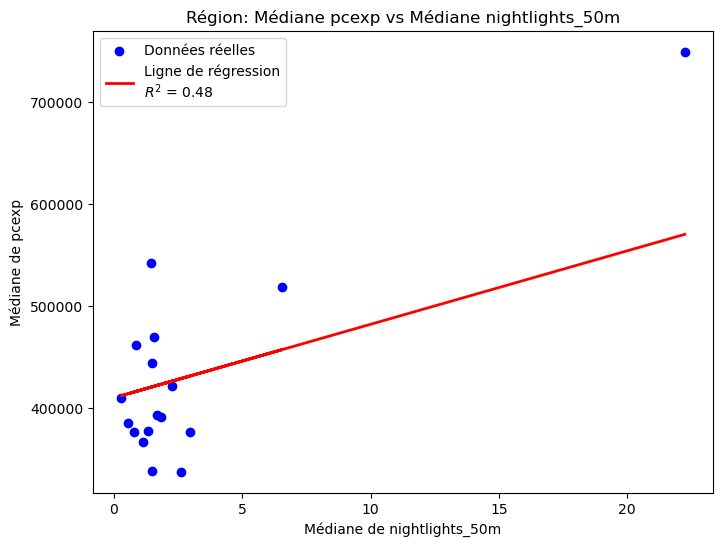


Cas 2: Grappe - Médiane pcexp vs Médiane nightlights_50m
R²: 0.3519, MSE: 33337727301.7228, MAE: 118332.3377


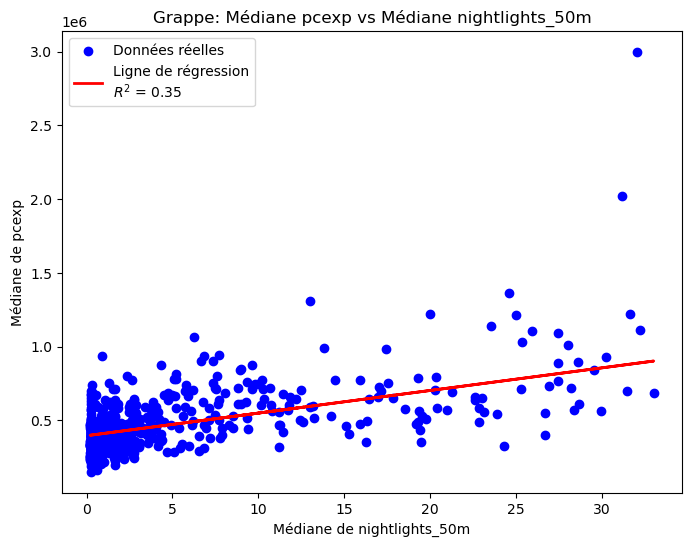


Cas 3: Région - Validation croisée 4-fold
R² moyen: 0.1801


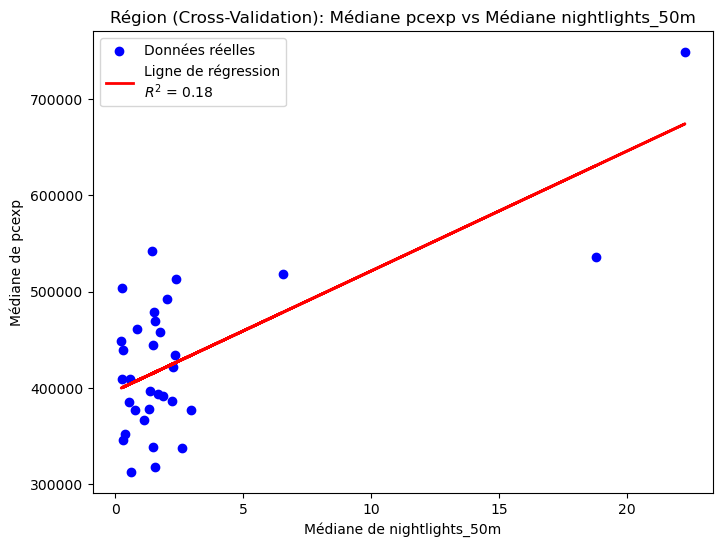


Cas 4: Grappe - Validation croisée 4-fold
R² moyen: 0.3595


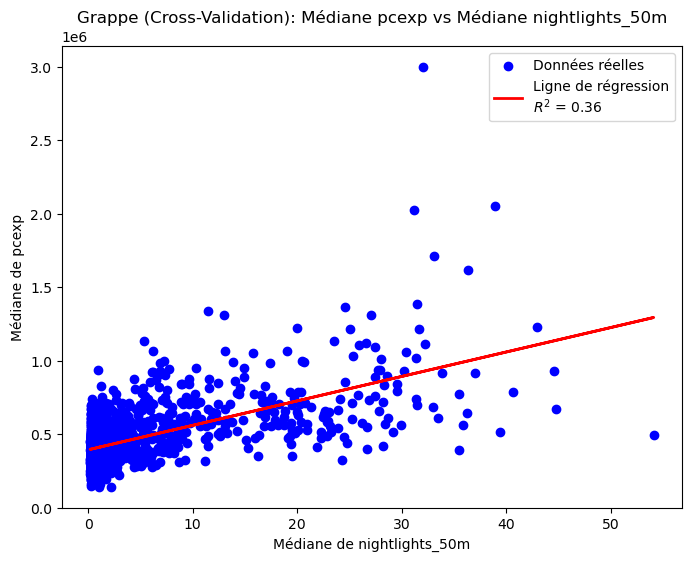

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Calcul des médianes par région
median_per_region = original_data.groupby('region')[['pcexp', 'nightlights_50m']].median().reset_index()

# Calcul des médianes par grappe
median_per_grappe = original_data.groupby(['region', 'grappe'])[['pcexp', 'nightlights_50m']].median().reset_index()

# Fonction pour ajuster et évaluer une régression OLS
def ols_regression(X_train, X_test, y_train, y_test):
    X_train = sm.add_constant(X_train)  # Ajout de l'intercept pour l'entraînement
    X_test = sm.add_constant(X_test)    # Ajout de l'intercept pour le test
    model = sm.OLS(y_train, X_train).fit()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Évaluation sur l'ensemble de test
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    return model, r2, mse, mae, y_pred_test

# Fonction pour afficher le graphe de régression
def plot_regression(X, y, y_pred, title, r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Données réelles')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Ligne de régression\n$R^2$ = {r2:.2f}')
    plt.title(title)
    plt.xlabel('Médiane de nightlights_50m')
    plt.ylabel('Médiane de pcexp')
    plt.legend()
    plt.show()

# Cas 1: Prédire la médiane des 'pcexp' pour chaque région en fonction des médianes de 'nightlights_50m' pour chaque région
X_region = median_per_region['nightlights_50m']
y_region = median_per_region['pcexp']

# Split des données en entraînement et test
X_region_train, X_region_test, y_region_train, y_region_test = train_test_split(X_region, y_region, test_size=0.5, random_state=42)

# Régression et évaluation
model_region, r2_region, mse_region, mae_region, y_pred_region = ols_regression(X_region_train, X_region_test, y_region_train, y_region_test)

# Affichage des résultats pour Cas 1
print("Cas 1: Région - Médiane pcexp vs Médiane nightlights_50m")
print(f"R²: {r2_region:.4f}, MSE: {mse_region:.4f}, MAE: {mae_region:.4f}")
plot_regression(X_region_test, y_region_test, y_pred_region, 'Région: Médiane pcexp vs Médiane nightlights_50m', r2_region)

# Cas 2: Prédire la médiane des 'pcexp' pour chaque grappe en fonction des médianes de 'nightlights_50m' pour chaque grappe
X_grappe = median_per_grappe['nightlights_50m']
y_grappe = median_per_grappe['pcexp']

# Split des données en entraînement et test
X_grappe_train, X_grappe_test, y_grappe_train, y_grappe_test = train_test_split(X_grappe, y_grappe, test_size=0.5, random_state=42)

# Régression et évaluation
model_grappe, r2_grappe, mse_grappe, mae_grappe, y_pred_grappe = ols_regression(X_grappe_train, X_grappe_test, y_grappe_train, y_grappe_test)

# Affichage des résultats pour Cas 2
print("\nCas 2: Grappe - Médiane pcexp vs Médiane nightlights_50m")
print(f"R²: {r2_grappe:.4f}, MSE: {mse_grappe:.4f}, MAE: {mae_grappe:.4f}")
plot_regression(X_grappe_test, y_grappe_test, y_pred_grappe, 'Grappe: Médiane pcexp vs Médiane nightlights_50m', r2_grappe)

# Validation croisée (2-fold) avec LinearRegression de scikit-learn
kf = KFold(n_splits=2, shuffle=True, random_state=42)
lr = LinearRegression()

# Cas 3: Validation croisée par région
X_region = median_per_region[['nightlights_50m']]
y_region = median_per_region['pcexp']

cv_scores_region = cross_val_score(lr, X_region, y_region, cv=kf, scoring='r2')
mean_r2_region_cv = np.mean(cv_scores_region)

print("\nCas 3: Région - Validation croisée 4-fold")
print(f"R² moyen: {mean_r2_region_cv:.4f}")

# Ajustement final du modèle pour afficher la ligne de régression pour Cas 3
lr.fit(X_region, y_region)
y_pred_region_cv = lr.predict(X_region)
plot_regression(X_region['nightlights_50m'], y_region, y_pred_region_cv, 'Région (Cross-Validation): Médiane pcexp vs Médiane nightlights_50m', mean_r2_region_cv)

# Cas 4: Validation croisée par grappe
X_grappe = median_per_grappe[['nightlights_50m']]
y_grappe = median_per_grappe['pcexp']

cv_scores_grappe = cross_val_score(lr, X_grappe, y_grappe, cv=kf, scoring='r2')
mean_r2_grappe_cv = np.mean(cv_scores_grappe)

print("\nCas 4: Grappe - Validation croisée 4-fold")
print(f"R² moyen: {mean_r2_grappe_cv:.4f}")

# Ajustement final du modèle pour afficher la ligne de régression pour Cas 4
lr.fit(X_grappe, y_grappe)
y_pred_grappe_cv = lr.predict(X_grappe)
plot_regression(X_grappe['nightlights_50m'], y_grappe, y_pred_grappe_cv, 'Grappe (Cross-Validation): Médiane pcexp vs Médiane nightlights_50m', mean_r2_grappe_cv)


Cas 1: Prédire 'pcexp' en fonction de 'nightlights_50m' (Split 70/30)
R²: 0.1208, MSE: 197054109660.4917, MAE: 280658.9805


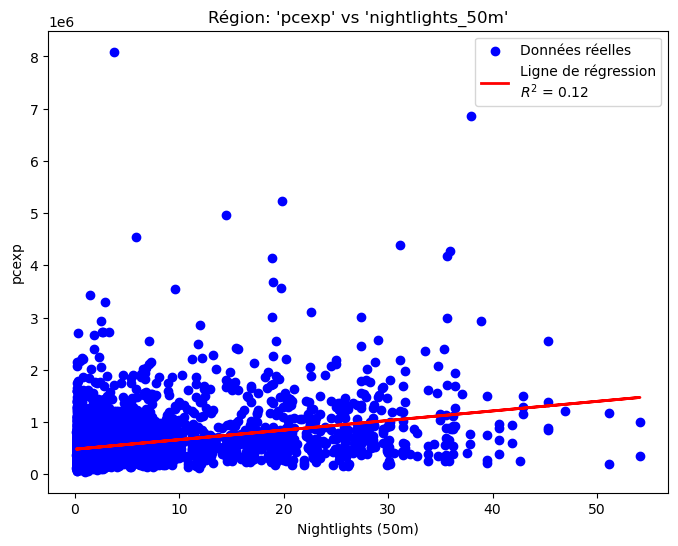


Cas 2: Prédire 'pcexp' en fonction de 'nightlights_50m' avec k-fold cross validation (k=5)
R² moyen: 0.1131, MSE moyen: 190442710171.0789, MAE moyen: 284545.7162


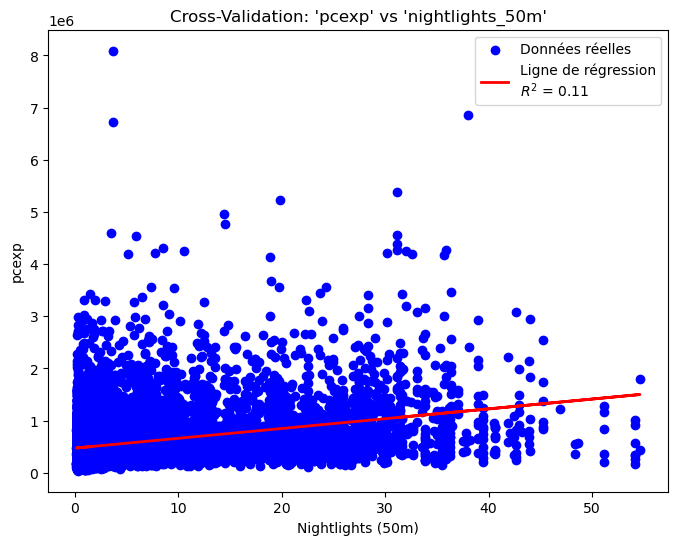

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Sélection des variables indépendantes et dépendantes
X = original_data[['nightlights_50m']]
y = original_data['pcexp']

# Fonction pour ajuster et évaluer une régression OLS
def ols_regression(X_train, X_test, y_train, y_test):
    X_train = sm.add_constant(X_train)  # Ajout de l'intercept pour l'entraînement
    X_test = sm.add_constant(X_test)    # Ajout de l'intercept pour le test
    model = sm.OLS(y_train, X_train).fit()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Évaluation sur l'ensemble de test
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    return model, r2, mse, mae, y_pred_test

# Fonction pour afficher le graphe de régression
def plot_regression(X, y, y_pred, title, r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Données réelles')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Ligne de régression\n$R^2$ = {r2:.2f}')
    plt.title(title)
    plt.xlabel('Nightlights (50m)')
    plt.ylabel('pcexp')
    plt.legend()
    plt.show()

# Cas 1: Prédire 'pcexp' en fonction de 'nightlights_50m' avec un split de 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Régression et évaluation
model, r2, mse, mae, y_pred = ols_regression(X_train, X_test, y_train, y_test)

# Affichage des résultats pour Cas 1
print("Cas 1: Prédire 'pcexp' en fonction de 'nightlights_50m' (Split 70/30)")
print(f"R²: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")
plot_regression(X_test['nightlights_50m'], y_test, y_pred, "Région: 'pcexp' vs 'nightlights_50m'", r2)

# Cas 2: Prédire 'pcexp' en fonction de 'nightlights_50m' avec k-fold cross validation k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

# Évaluation par validation croisée
cv_scores_r2 = cross_val_score(lr, X, y, cv=kf, scoring='r2')
cv_scores_mse = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_absolute_error')

mean_r2_cv = np.mean(cv_scores_r2)
mean_mse_cv = -np.mean(cv_scores_mse)  # Inverser le signe car MSE est négatif dans cross_val_score
mean_mae_cv = -np.mean(cv_scores_mae)  # Inverser le signe car MAE est négatif dans cross_val_score

print("\nCas 2: Prédire 'pcexp' en fonction de 'nightlights_50m' avec k-fold cross validation (k=5)")
print(f"R² moyen: {mean_r2_cv:.4f}, MSE moyen: {mean_mse_cv:.4f}, MAE moyen: {mean_mae_cv:.4f}")

# Ajustement final du modèle pour afficher la ligne de régression pour Cas 2
lr.fit(X, y)
y_pred_cv = lr.predict(X)
plot_regression(X['nightlights_50m'], y, y_pred_cv, "Cross-Validation: 'pcexp' vs 'nightlights_50m'", mean_r2_cv)


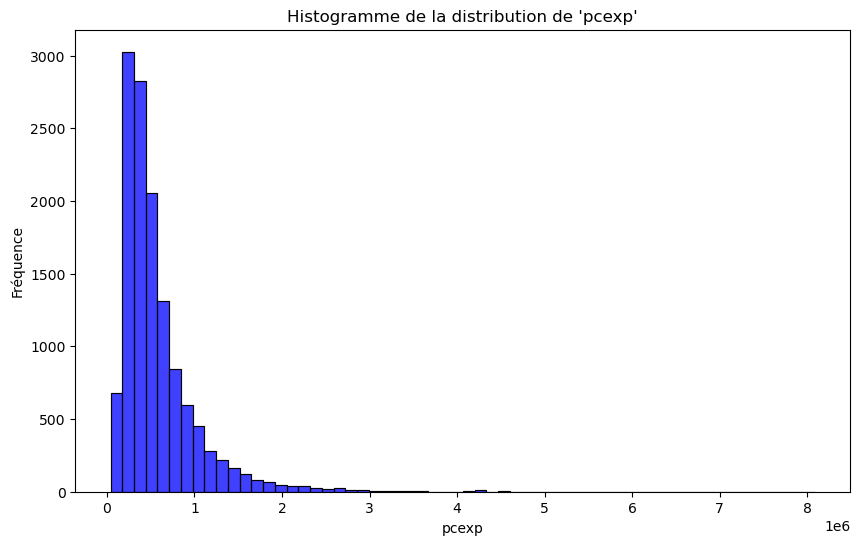

C:\Users\Dell\AppData\Local\Temp\ipykernel_17944\3417016256.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data['pcexp'], shade=True, color='green')


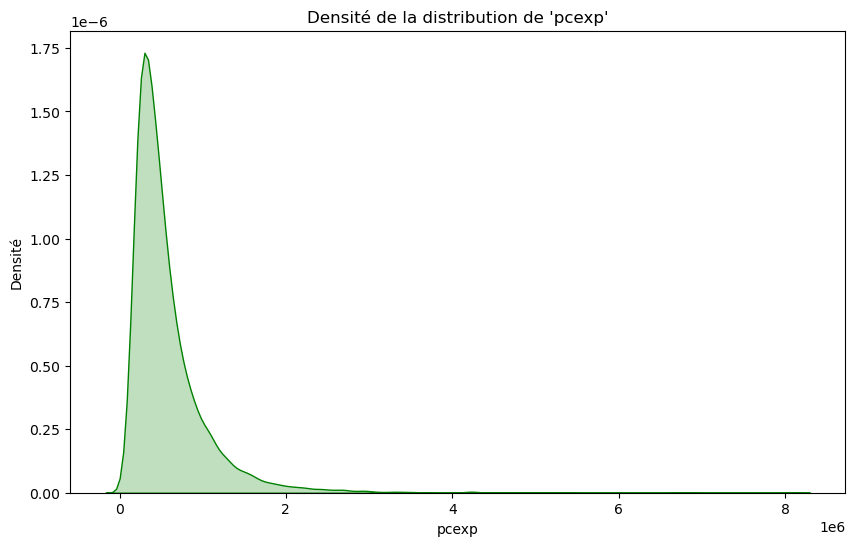

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Affichage d'un histogramme de la distribution de 'pcexp'
plt.figure(figsize=(10, 6))
sns.histplot(original_data['pcexp'], bins=60, kde=False, color='blue')
plt.title("Histogramme de la distribution de 'pcexp'")
plt.xlabel('pcexp')
plt.ylabel('Fréquence')
plt.show()

# Affichage d'un graphique de densité de la distribution de 'pcexp'
plt.figure(figsize=(10, 6))
sns.kdeplot(original_data['pcexp'], shade=True, color='green')
plt.title("Densité de la distribution de 'pcexp'")
plt.xlabel('pcexp')
plt.ylabel('Densité')
plt.show()


In [20]:
import pandas as pd
import numpy as np

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Définir le nombre de bacs (bins) pour l'histogramme
num_bins = 60

# Calculer les fréquences pour chaque intervalle (bin)
counts, bin_edges = np.histogram(original_data['pcexp'], bins=num_bins)

# Créer un DataFrame pour résumer les informations
histogram_summary = pd.DataFrame({
    'Intervalle': pd.IntervalIndex.from_breaks(bin_edges),
    'Fréquence': counts
})

# Afficher le tableau
print(histogram_summary)


                                  Intervalle  Fréquence
0                  (40691.957, 174853.34105]        678
1                (174853.34105, 309014.7251]       3026
2                (309014.7251, 443176.10915]       2824
3                (443176.10915, 577337.4932]       2053
4                (577337.4932, 711498.87725]       1314
5                (711498.87725, 845660.2613]        843
6                (845660.2613, 979821.64535]        594
7         (979821.64535, 1113983.0293999999]        451
8   (1113983.0293999999, 1248144.4134499999]        283
9   (1248144.4134499999, 1382305.7974999999]        220
10  (1382305.7974999999, 1516467.1815499999]        160
11  (1516467.1815499999, 1650628.5655999999]        125
12  (1650628.5655999999, 1784789.9496499998]         79
13  (1784789.9496499998, 1918951.3336999998]         66
14  (1918951.3336999998, 2053112.7177499998]         46
15        (2053112.7177499998, 2187274.1018]         38
16             (2187274.1018, 2321435.48585]    

In [21]:
import pandas as pd
import numpy as np

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Définir le nombre de bacs (bins) pour l'histogramme
num_bins = 60

# Calculer les fréquences pour chaque intervalle (bin)
counts, bin_edges = np.histogram(original_data['pcexp'], bins=num_bins)

# Créer un DataFrame pour résumer les informations
histogram_summary = pd.DataFrame({
    'Intervalle': pd.IntervalIndex.from_breaks(bin_edges),
    'Fréquence': counts
})

# Ajouter des colonnes pour la médiane, le minimum et le maximum de 'nightlights_50m'
median_values = []
min_values = []
max_values = []

for interval in histogram_summary['Intervalle']:
    subset = original_data[(original_data['pcexp'] > interval.left) & (original_data['pcexp'] <= interval.right)]
    if not subset.empty:
        median_values.append(subset['nightlights_50m'].median())
        min_values.append(subset['nightlights_50m'].min())
        max_values.append(subset['nightlights_50m'].max())
    else:
        median_values.append(np.nan)
        min_values.append(np.nan)
        max_values.append(np.nan)

histogram_summary['Médiane_nightlights_50m'] = median_values
histogram_summary['Min_nightlights_50m'] = min_values
histogram_summary['Max_nightlights_50m'] = max_values

# Afficher le tableau
print(histogram_summary)


                                  Intervalle  Fréquence  \
0                  (40691.957, 174853.34105]        678   
1                (174853.34105, 309014.7251]       3026   
2                (309014.7251, 443176.10915]       2824   
3                (443176.10915, 577337.4932]       2053   
4                (577337.4932, 711498.87725]       1314   
5                (711498.87725, 845660.2613]        843   
6                (845660.2613, 979821.64535]        594   
7         (979821.64535, 1113983.0293999999]        451   
8   (1113983.0293999999, 1248144.4134499999]        283   
9   (1248144.4134499999, 1382305.7974999999]        220   
10  (1382305.7974999999, 1516467.1815499999]        160   
11  (1516467.1815499999, 1650628.5655999999]        125   
12  (1650628.5655999999, 1784789.9496499998]         79   
13  (1784789.9496499998, 1918951.3336999998]         66   
14  (1918951.3336999998, 2053112.7177499998]         46   
15        (2053112.7177499998, 2187274.1018]         38 